### Import libraries

In [23]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Load Data

In [10]:
data = pd.read_excel("Movement_dataset_v2.xlsx")
data.head()

,Subject ID,Activity ID,Time stamp,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz
0,1,1,1,0.28409,-9.5692,1.4931,0.70501,-0.48968,0.058939,-0.98630,-8.7188,4.1161,0.64510,-0.45175,0.69181
1,1,1,2,0.41798,-9.6980,1.4880,0.70501,-0.48968,0.058939,-0.98795,-9.0372,4.2773,0.66667,-0.44353,0.66810
2,1,1,3,0.33479,-9.5896,1.4405,0.69388,-0.48593,0.078585,-0.89327,-8.7099,4.0124,0.66667,-0.44353,0.66810
3,1,1,4,0.27516,-9.6480,1.5412,0.69388,-0.48593,0.078585,-0.95632,-8.7986,4.1434,0.66667,-0.44353,0.66810
4,1,1,5,0.32434,-9.6298,1.3759,0.69388,-0.48593,0.078585,-0.95808,-8.5089,4.1058,0.66863,-0.45175,0.69181


### Q1.1.
Are there any highly correlated variables (i.e., correlation larger than 0.90)? 

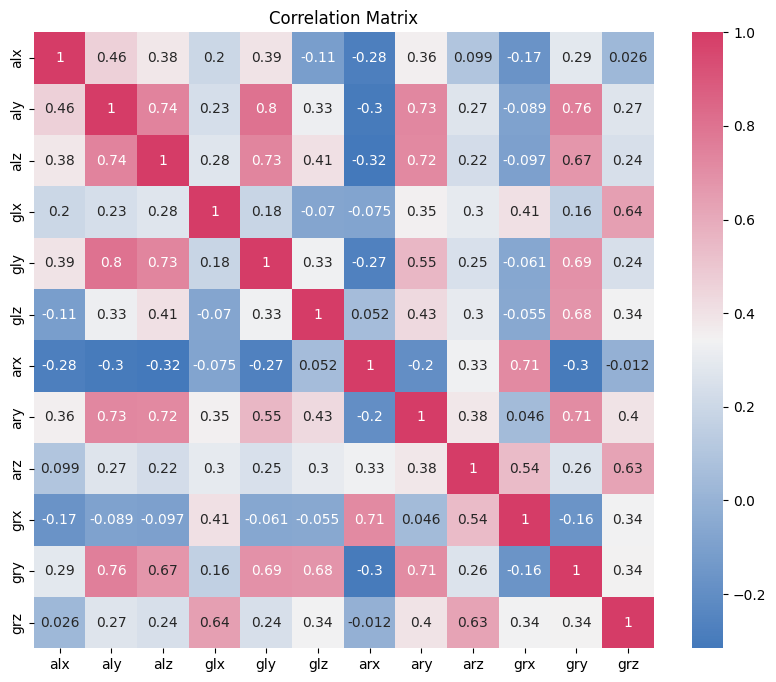

In [55]:
correlation_matrix = data[data.columns[3:]].corr()

correlated_pairs = []

# Iterate through the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if correlation_matrix.iloc[i, j] > 0.9:
            correlated_pairs.append((i, j))

# Create an empty matrix with NaN values
highlight_matrix = np.empty_like(correlation_matrix, dtype=float)
highlight_matrix[:] = np.nan

# Set the correlation values for highly correlated pairs
for pair in correlated_pairs:
    highlight_matrix[pair[0], pair[1]] = correlation_matrix.iloc[pair[0], pair[1]]
    highlight_matrix[pair[1], pair[0]] = correlation_matrix.iloc[pair[1], pair[0]]

# Create a colormap with white for NaN values
cmap = sns.diverging_palette(250, 1, as_cmap=True)
cmap.set_bad('white')

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap=cmap)#, mask=np.isnan(highlight_matrix))

# Set the title and display the heatmap
plt.title('Correlation Matrix')
plt.show()

### Q1.2.
Are there any missing data? 


In [67]:
missing_data = False

number_of_patients=10
number_of_experiments=4
number_of_timestamps=30

for patient_number in range(1,number_of_patients+1):
    patient_data = data[data.iloc[:, 0]==patient_number]
    if patient_data.empty:
        missing_data=True
        break
    else:
        for experiment_number in range(1, number_of_experiments+1):
            experiment_data = patient_data[patient_data.iloc[:, 1]==experiment_number]
            if experiment_data.empty:
                missing_data=True
                break
            else:
                for timestamp_number in range(1, number_of_timestamps+1):
                    timestamp_data = experiment_data[experiment_data.iloc[:, 2]==timestamp_number]
                if timestamp_data.empty:
                    missing_data=True
                    break
                else:
                    if timestamp_data.isnull().any().any():
                        missing_data=True
                        break

if missing_data:
    print("There is missing data in the dataset!")
else:
    print("There is no missing data in the dataset!")

There is no missing data in the dataset!


### Q1.3. 
How many duplicated rows are present in your dataset, if any? 

In [66]:
no_duplicates = data[data.duplicated()].empty

if no_duplicates:
    print("There are no duplicates in the dataset!")
else:
    print("There are duplicates in the dataset!")

There are no duplicates in the dataset!


### Q1.4.
What type(s) of scaling procedures among the ones reported below would be in principle correct for the dataset under analysis and why? 

### 2 Pre-processing

In [70]:
columns_to_scale = data.columns[3:]
data[columns_to_scale] = (data[columns_to_scale] - data[columns_to_scale].min()) / (data[columns_to_scale].max() - data[columns_to_scale].min())

### Q2.1.
How many variables are necessary to capture at least 90% of your dataset variance (given the steps explained above)? 

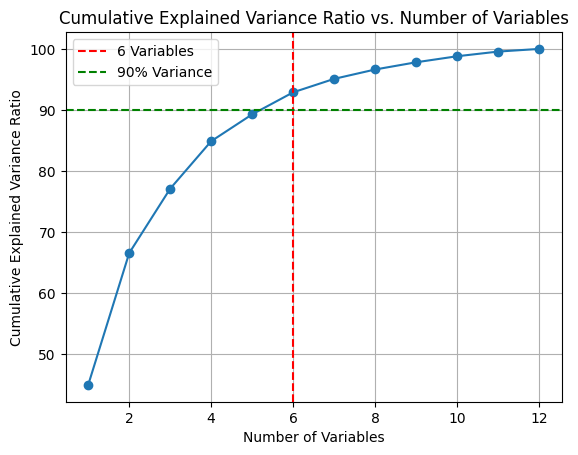

In [78]:
from sklearn.decomposition import PCA

pcadata=data[data.columns[3:]]

# Perform PCA analysis
pca = PCA()
pca.fit(pcadata)

# Calculate cumulative explained variance ratio
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)*100

# Determine the number of variables needed to capture at least 90% of the variance
num_variables_needed = len(explained_variance_ratio_cumulative[explained_variance_ratio_cumulative < 90]) + 1

# Plot the cumulative explained variance ratio
plt.plot(range(1, len(explained_variance_ratio_cumulative) + 1), explained_variance_ratio_cumulative, marker='o')
plt.xlabel('Number of Variables')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Variables')
plt.axvline(x=num_variables_needed, color='r', linestyle='--', label=f'{num_variables_needed} Variables')
plt.axhline(y=90, color='g', linestyle='--', label='90% Variance')
plt.legend()
plt.grid(True)
plt.show()

In [79]:
loadings_pc1 = pca.components_[0]

# Find the variable with the highest impact on PC1
variable_index = loadings_pc1.argmax()
variable_with_highest_impact = pcadata.columns[variable_index]

# Print the variable with the highest impact on PC1
print("Variable with the highest impact on PC1:", variable_with_highest_impact)

Variable with the highest impact on PC1: gry


In [82]:
loadings_pc1 = pca.components_[1]

# Find the variable with the highest impact on PC1
variable_index = loadings_pc1.argmax()
variable_with_highest_impact = pcadata.columns[variable_index]

# Print the variable with the highest impact on PC1
print("Variable with the highest impact on PC2:", variable_with_highest_impact)

Variable with the highest impact on PC2: grx


In [85]:
loadings_pc1 = pca.components_[1]

# Find the variable with the highest impact on PC1
variable_index = loadings_pc1.argmin()
variable_with_highest_impact = pcadata.columns[variable_index]

# Print the variable with the highest impact on PC1
print("Variable with the lowest impact on PC2:", variable_with_highest_impact)

Variable with the lowest impact on PC2: gry
